<a href="https://colab.research.google.com/github/aarakova/VvAD/blob/lab2/%D0%9B%D0%A02_%D0%A0%D0%B0%D0%BA%D0%BE%D0%B2%D0%B0_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Цель работы**

Изучить связи между признаками двумерного набора данных, научиться визуализировать данные.

**Индивидуальное задание**

Набор данных credit_risk2.csv
Содержит информацию о кредитных заявках:
1. возраст
2. доход
3. статус домовладения (Собственный, Ипотека, Аренда)
4. стаж работы в годах
5. цель кредита
6. сумма кредита по заявке
7. процентная ставка
8. статус одобрения кредита
9. сумма кредита в процентах от дохода
10. не допустил ли заявитель ранее дефолта по кредиту (да, нет)
11. длина кредитной истории заявителя

Задание 1: Использовать seaborn. По группировке – цель кредита (intent) по количеству статуса домовладения (home) построить диаграмму.

Задание 2: Использовать pandas и plot. Отфильтровать возраст – до 100. По сводной таблице (pivot_table) – отобразить средний доход (income) по возрасту. Оставить только маркеры в виде ★ коричневого цвета размером 16.

Задание 3: Использовать matplotlib. Построить круговую диаграмму, которая отображает процент по каждой цели кредита (intent).

**Выполнение лабораторной работы**

Импортируем необходимые библиотеки:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Создаем датафрейм на основе исходных данных из csv-файла:

In [ ]:
df = pd.read_csv('credit_risk2.csv')
df.head(20)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22.0,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21.0,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25.0,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23.0,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24.0,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
5,5,21.0,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2
6,6,26.0,77100,RENET,8.0,EDUCATION,35000,12.42,1,0.45,N,3
7,7,24.0,78956,RENT,5.0,MEDICAL,35000,11.11,1,0.44,N,4
8,8,24.0,83000,RENT,8.0,PERSONAL,35000,8.90,1,0.42,N,2
9,9,21.0,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3


С помощбю метода ```info()``` получаем общую информацию о столбцах:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 650 entries, 0 to 649
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              650 non-null    int64  
 1   Age             650 non-null    float64
 2   Income          650 non-null    int64  
 3   Home            650 non-null    object 
 4   Emp_length      641 non-null    float64
 5   Intent          650 non-null    object 
 6   Amount          650 non-null    int64  
 7   Rate            584 non-null    float64
 8   Status          650 non-null    int64  
 9   Percent_income  650 non-null    float64
 10  Default         650 non-null    object 
 11  Cred_length     650 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 66.0+ KB


С помощью метода ```describe()``` получаем информацию о числовых столбцах:

In [ ]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,652.000000,652.000000,652.000000,643.000000,652.000000,586.000000,652.000000,652.000000,652.000000
mean,325.495399,24.285276,90008.855828,4.601866,18800.996933,12.289471,0.601227,0.279831,3.012270
std,188.352535,7.841061,69530.312525,7.281616,9152.896250,3.272772,0.490022,0.150231,0.808843
min,0.000000,21.000000,9600.000000,0.000000,1000.000000,5.420000,0.000000,0.010000,2.000000
25%,162.750000,23.000000,44000.000000,2.000000,10000.000000,10.250000,0.000000,0.160000,2.000000
50%,325.500000,24.000000,69998.000000,4.000000,21850.000000,12.180000,1.000000,0.280000,3.000000
75%,488.250000,25.000000,128499.000000,7.000000,25000.000000,14.720000,1.000000,0.380000,4.000000
max,649.000000,144.000000,500000.000000,123.000000,35000.000000,21.210000,1.000000,0.830000,4.000000


Далее была проведена проверка на наличие неявных дубликатов:

In [ ]:
print(df['Home'].unique())
print(df['Intent'].unique())
print(df['Default'].unique())

['RENT' 'OWN' 'MORTGAGE' 'RENET' 'OTHER']
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
['Y' 'N' 'No']


Выявлено два неявных дубликата: No и RENET. Их необходимо заменить на N и RENT соответственно.

In [ ]:
df['Home'] = df['Home'].replace('RENET', 'RENT')
df['Default'] = df['Default'].replace('No', 'N')

print(df['Home'].unique())
print(df['Default'].unique())

['RENT' 'OWN' 'MORTGAGE' 'OTHER']
['Y' 'N']


Следующий этап - удаление дубликатов:

In [ ]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 650 entries, 0 to 649
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              650 non-null    int64  
 1   Age             650 non-null    float64
 2   Income          650 non-null    int64  
 3   Home            650 non-null    object 
 4   Emp_length      641 non-null    float64
 5   Intent          650 non-null    object 
 6   Amount          650 non-null    int64  
 7   Rate            584 non-null    float64
 8   Status          650 non-null    int64  
 9   Percent_income  650 non-null    float64
 10  Default         650 non-null    object 
 11  Cred_length     650 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 66.0+ KB


Перед началом получения информации о данных необходимо заменить пустные значения.

In [ ]:
df['Home'] = df['Home'].fillna('OTHER')
df['Intent'] = df['Intent'].fillna('OTHER')
df['Default'] = df['Default'].dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 650 entries, 0 to 649
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              650 non-null    int64  
 1   Age             650 non-null    float64
 2   Income          650 non-null    int64  
 3   Home            650 non-null    object 
 4   Emp_length      641 non-null    float64
 5   Intent          650 non-null    object 
 6   Amount          650 non-null    int64  
 7   Rate            584 non-null    float64
 8   Status          650 non-null    int64  
 9   Percent_income  650 non-null    float64
 10  Default         650 non-null    object 
 11  Cred_length     650 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 66.0+ KB


Далее была создана матрица диаграмм рассеивания:

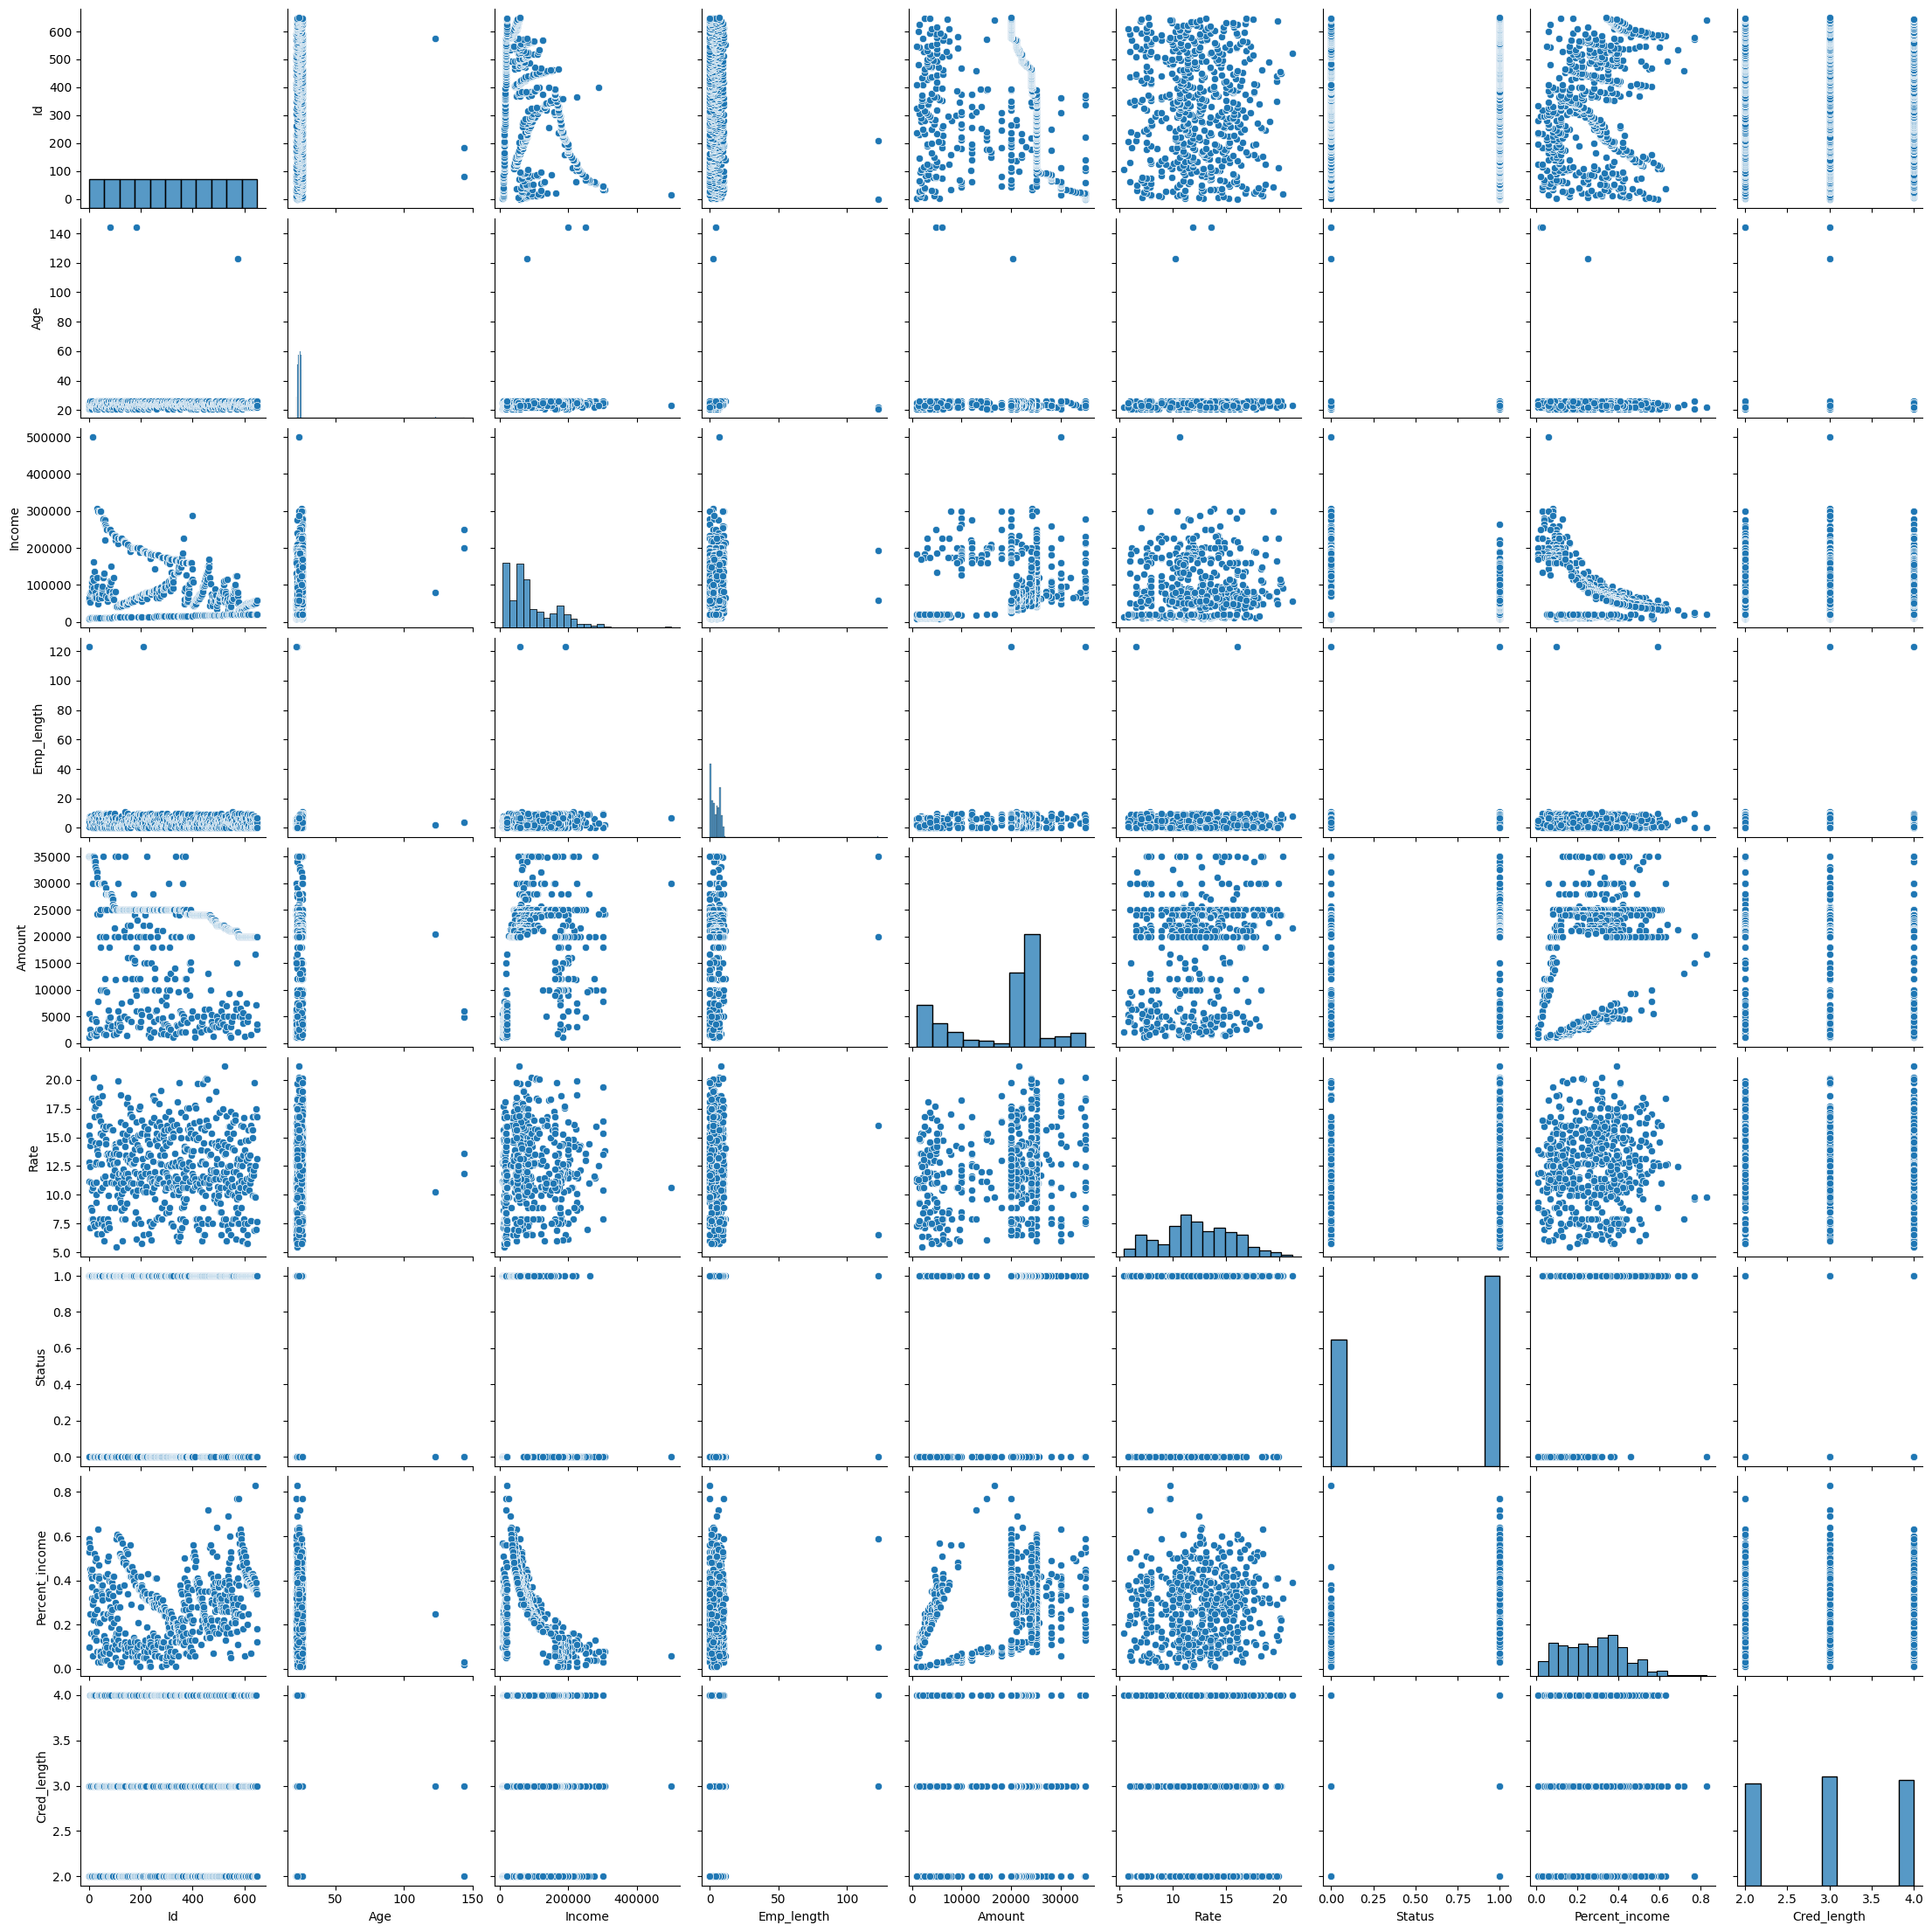

In [ ]:
sb.pairplot(df)

Диаграмма показывает, что доход растет с возрастом, но после определенной точки этот рост замедляется. Собственники жилья и те, кто выплачивает ипотеку, как правило, запрашивают более крупные кредиты по сравнению с арендаторами. Стаж работы положительно коррелирует с доходом, однако наблюдаются выбросы. Цель кредита может влиять на процентные ставки и шансы на одобрение. Большие суммы кредитов обычно сопровождаются более низкими процентными ставками. У лиц с высоким доходом кредиты составляют меньший процент от их доходов. Наличие дефолтов в прошлом снижает вероятность одобрения кредита. Длинная кредитная история способствует снижению процентной ставки и повышает шансы на одобрение кредита.

Были вычислены коэффициенты ковариации и корреляции для подтверждения выявленных зависимостей:

Age and Income. Correlation: 0.14739188587008523, Covariance: 80576.06468649996
Age and Amount. Correlation: -0.02935735146272596, Covariance: -2113.2801943818886
Income and Amount. Correlation: 0.29064265552788576, Covariance: 185473566.55683306
Emp_length and Income. Correlation: 0.09661574697802452, Covariance: 49010.29041049142
Percent_income and Amount. Correlation: 0.3429221077721428, Covariance: 472.85883015289795


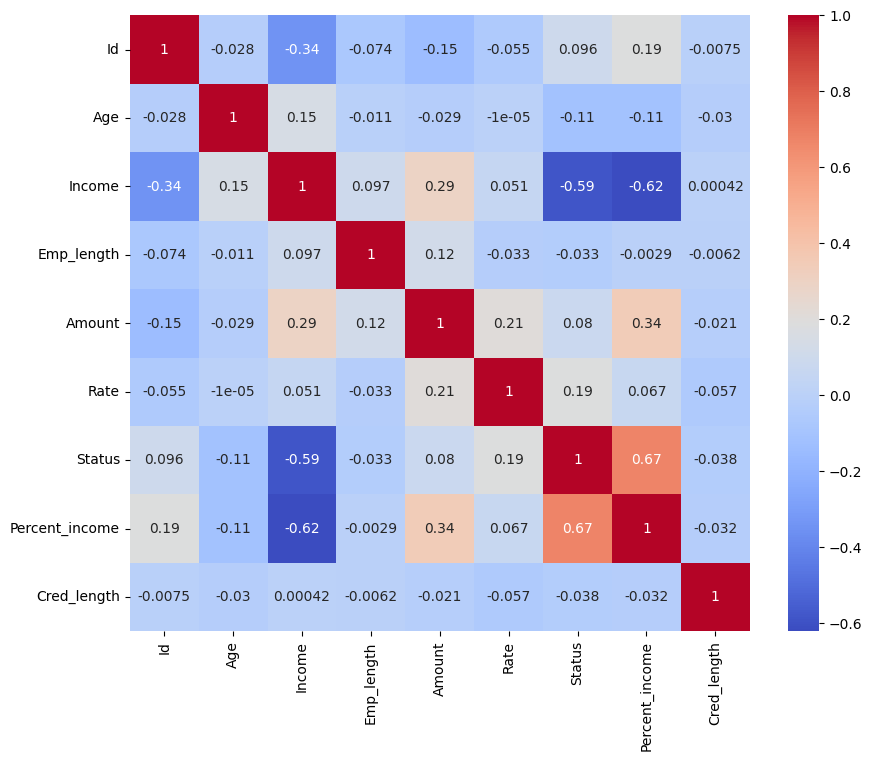

In [ ]:
def corandcov(row1txt, row2txt):
    row1 = df[row1txt]
    row2 = df[row2txt]

    correlation = row1.corr(row2)
    covariance = row1.cov(row2)

    print(f"{row1txt} and {row2txt}. Correlation: {correlation}, Covariance: {covariance}")

corandcov("Age", "Income")
corandcov("Age", "Amount")
corandcov("Income", "Amount")
corandcov("Emp_length", "Income")
corandcov("Percent_income", "Amount")

correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

Для выполнения 1го задания была создана группировка данных:

In [ ]:
grouped = df.groupby(['Intent', 'Home']).size().reset_index(name='Count')
grouped

,Intent,Home,Count
0,DEBTCONSOLIDATION,MORTGAGE,21
1,DEBTCONSOLIDATION,OWN,9
2,DEBTCONSOLIDATION,RENT,72
3,EDUCATION,MORTGAGE,34
4,EDUCATION,OTHER,1
5,EDUCATION,OWN,16
6,EDUCATION,RENT,94
7,HOMEIMPROVEMENT,MORTGAGE,13
8,HOMEIMPROVEMENT,OWN,16
9,HOMEIMPROVEMENT,RENT,39


Построение диаграммы, основываясь на сгруппированных данных:

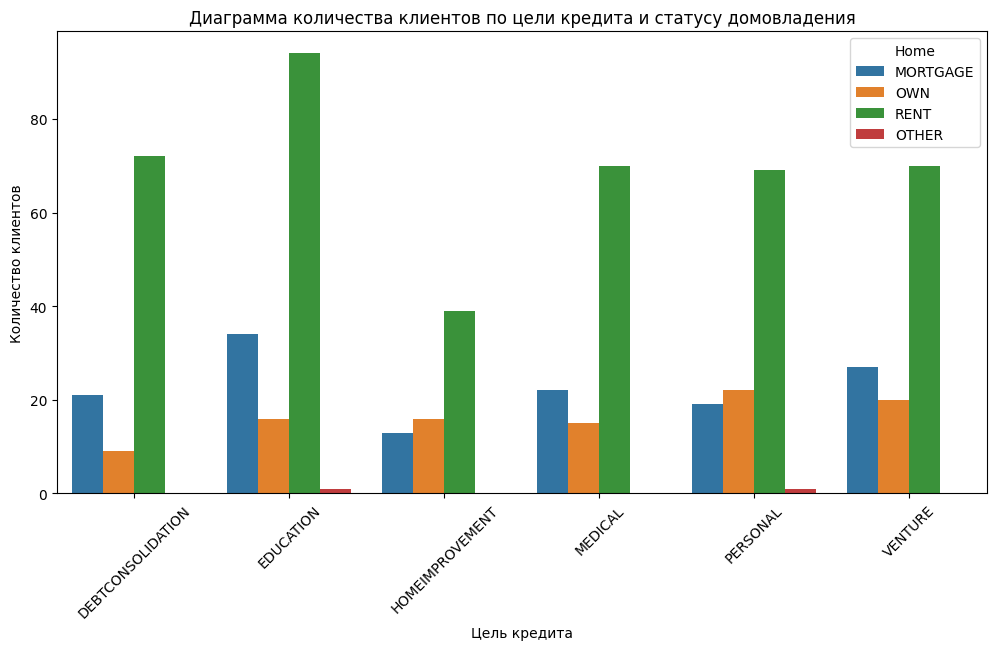

In [ ]:
plt.figure(figsize=(12, 6))
sb.barplot(data=grouped, x='Intent', y='Count', hue='Home')

plt.title("Диаграмма количества клиентов по цели кредита и статусу домовладения")
plt.xlabel("Цель кредита")
plt.ylabel("Количество клиентов")

plt.xticks(rotation=45)

plt.show()

Далее было выполнено задание 2. Сначала была создана сводная таблица:

In [ ]:
filtered_df = df[df['Age'] < 100]
pivot_table = filtered_df.pivot_table(values='Income', index='Age', aggfunc='mean')
pivot_table

,Income
Age,
21.0,42238.581395
22.0,64423.880734
23.0,85682.353846
24.0,88684.029197
25.0,106750.023077
26.0,122793.744898


После этого был создан график:

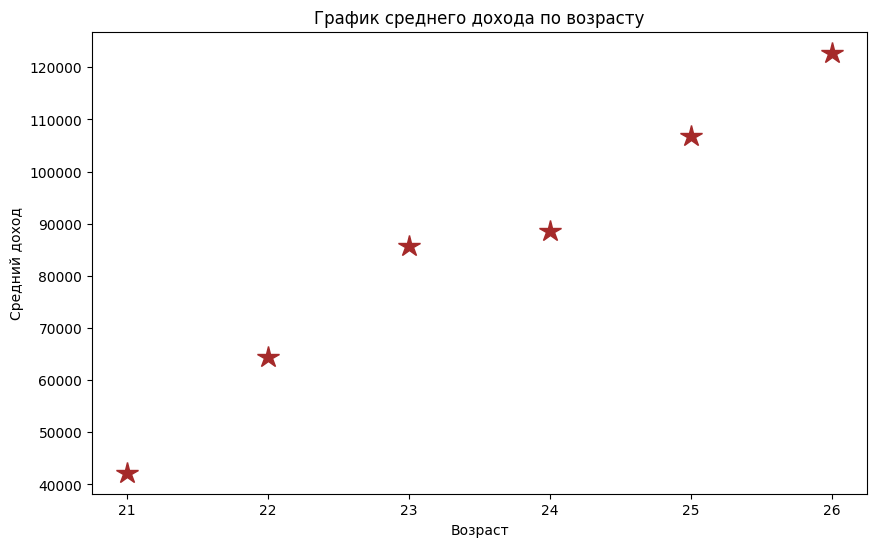

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(pivot_table.index, pivot_table['Income'], linestyle='none', marker='*',
         color='brown', markersize=16)

plt.title('График среднего дохода по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Средний доход')

plt.show()

Далее было выполнено третье задание. Сначала был выделен столбец с целями кредита:

In [ ]:
intent_column = df['Intent'].value_counts()
intent_column

,count
Intent,
EDUCATION,145
VENTURE,117
PERSONAL,111
MEDICAL,107
DEBTCONSOLIDATION,102
HOMEIMPROVEMENT,68


После этого была рассчитана доля каждой цели кредита в общем количестве заявок:

In [ ]:
intent_counts = df['Intent'].value_counts(normalize=True) * 100
intent_counts

,proportion
Intent,
EDUCATION,22.307692
VENTURE,18.000000
PERSONAL,17.076923
MEDICAL,16.461538
DEBTCONSOLIDATION,15.692308
HOMEIMPROVEMENT,10.461538


Далее была построена сама диаграмма:

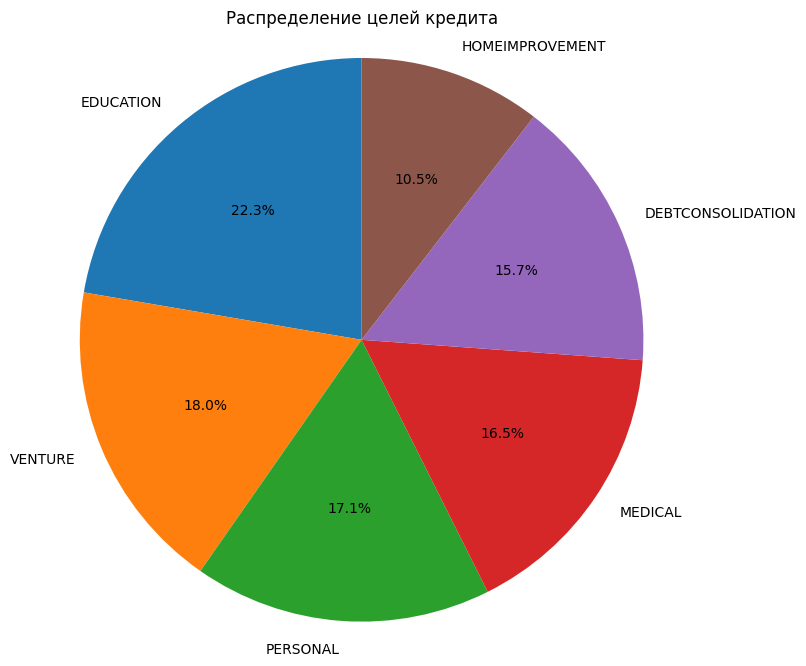

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(intent_counts, labels=intent_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Распределение целей кредита')
plt.axis('equal')

plt.show()

**Выводы**

В результате выполнения лабораторной работы, анализ данных показал, что наибольший процент заявок на кредиты приходится на категории "Education", "Venture", "Personal" и "Medical". Эти цели кредитов наиболее популярны среди заявителей, тогда как такие категории, как "Debtconsolidation" и "Homeimprovement", составляют значительно меньшую долю от общего числа заявок.

При анализе среднего дохода по возрастным группам было замечено, что в целом доходы растут с увеличением возраста. Молодые люди в возрасте 21-22 лет имеют сравнительно низкий средний доход. Однако в возрастной группе 23-24 лет наблюдается отклонение от общего тренда — рост доходов замедляется или остается на прежнем уровне. Это может указывать на наличие определенных факторов, влияющих на доходы в этом возрасте. После этого периода доходы снова начинают увеличиваться, начиная с 25 лет.

Столбчатая диаграмма, которая показывала распределение целей кредита в зависимости от статуса домовладения, выявила, что арендаторы (RENT) значительно чаще подают заявки на кредиты по сравнению с владельцами жилья и теми, кто находится в процессе выплаты ипотеки. Особенно это заметно в категории "Education".

В результате проведенного анализа были выявлены ключевые тенденции в распределении кредитных заявок. Наиболее частой целью кредитов является образование, и арендаторы жилья доминируют среди заявителей на кредиты. Анализ также показал интересное отклонение в росте доходов в возрастной группе 23-24 лет, что может потребовать дальнейшего изучения для выявления возможных причин стагнации доходов в этот период.
